In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features_df = pd.read_csv('../data/features.csv')
train_df = pd.read_csv('../data/train.csv')
stores_df = pd.read_csv('../data/stores.csv')
test_df = pd.read_csv('../data/test.csv')

In [3]:
print(train_df.shape)
print(test_df.shape)
print(stores_df.shape)
print(features_df.shape)

(421570, 5)
(115064, 4)
(45, 3)
(8190, 12)


In [4]:
train_df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [5]:
test_df.head(20)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
5,1,1,2012-12-07,False
6,1,1,2012-12-14,False
7,1,1,2012-12-21,False
8,1,1,2012-12-28,True
9,1,1,2013-01-04,False


In [6]:
features_df.head(20)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [7]:
features_df.duplicated(subset = ['Store', 'IsHoliday', 'Date']).sum() #To check weather the pairs of three are unique or not for merging purpose 

np.int64(0)

In [8]:
stores_df.head(20)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [9]:
train_merged = pd.merge(train_df, stores_df, how='left', on='Store')
train_merged = pd.merge(train_merged, features_df, how='left', on=['Store', 'Date', 'IsHoliday'])


In [10]:
train_merged

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [11]:
#Converting the date time format
train_merged['Date'] = pd.to_datetime(train_merged['Date'])

In [12]:
#Checking missing values
train_merged.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [13]:
train_merged.fillna(train_merged.median(numeric_only = True), inplace = True)

In [14]:
train_merged

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,5347.45,192.00,24.60,1481.31,3359.45,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,5347.45,192.00,24.60,1481.31,3359.45,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,5347.45,192.00,24.60,1481.31,3359.45,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,5347.45,192.00,24.60,1481.31,3359.45,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,5347.45,192.00,24.60,1481.31,3359.45,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,192.00,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,192.00,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,192.00,3.18,437.73,1537.49,192.330854,8.667


In [15]:
train_merged.to_csv('../data/cleaned_train.csv', index = False)

In [16]:
pd.read_csv('../data/cleaned_train.csv')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,5347.45,192.00,24.60,1481.31,3359.45,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,5347.45,192.00,24.60,1481.31,3359.45,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,5347.45,192.00,24.60,1481.31,3359.45,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,5347.45,192.00,24.60,1481.31,3359.45,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,5347.45,192.00,24.60,1481.31,3359.45,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,192.00,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,192.00,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,192.00,3.18,437.73,1537.49,192.330854,8.667


In [17]:
df = pd.read_csv('../data/cleaned_train.csv').copy()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,136727.915739,60.090059,3.361027,6026.195471,1021.307467,484.687953,2090.196076,3815.475623,171.201947,7.960289
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,93638.000000,46.680000,2.933000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,132.022667,6.891000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,202505.000000,74.280000,3.738000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,212.416993,8.572000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000
std,12.785297,30.492054,NaN,22711.183519,60980.583328,18.447931,0.458515,5039.770624,5060.726828,5527.479863,3669.249108,3625.326240,39.159276,1.863296


In [21]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,5347.45,192.0,24.6,1481.31,3359.45,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,5347.45,192.0,24.6,1481.31,3359.45,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,5347.45,192.0,24.6,1481.31,3359.45,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,5347.45,192.0,24.6,1481.31,3359.45,211.350143,8.106


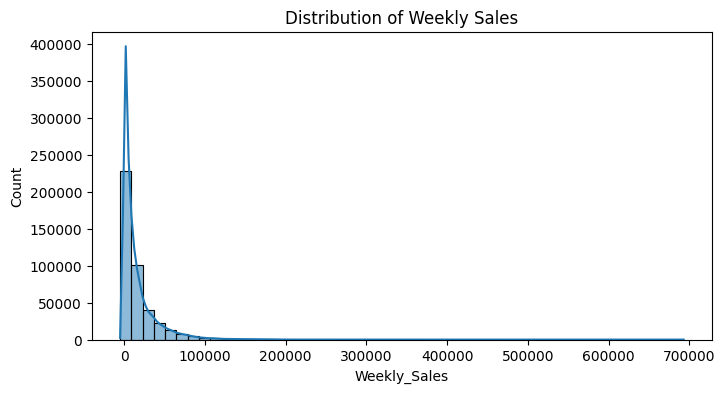

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.show()

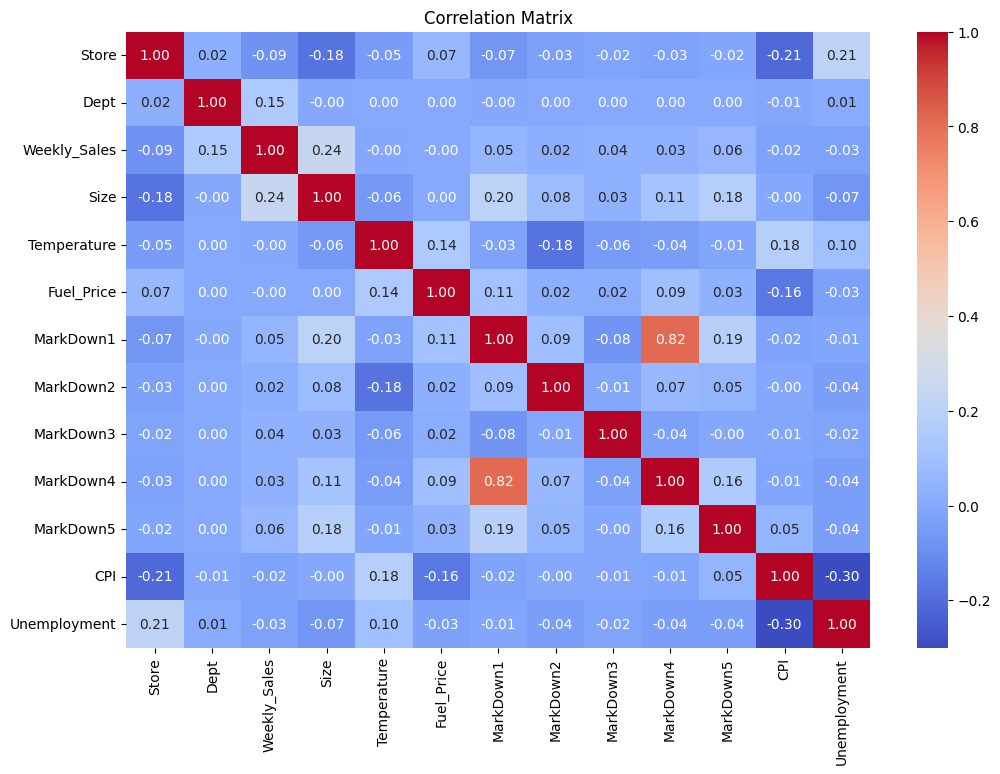

In [23]:
numeric_df = df.select_dtypes(include = ['number'])
plt.figure(figsize = (12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

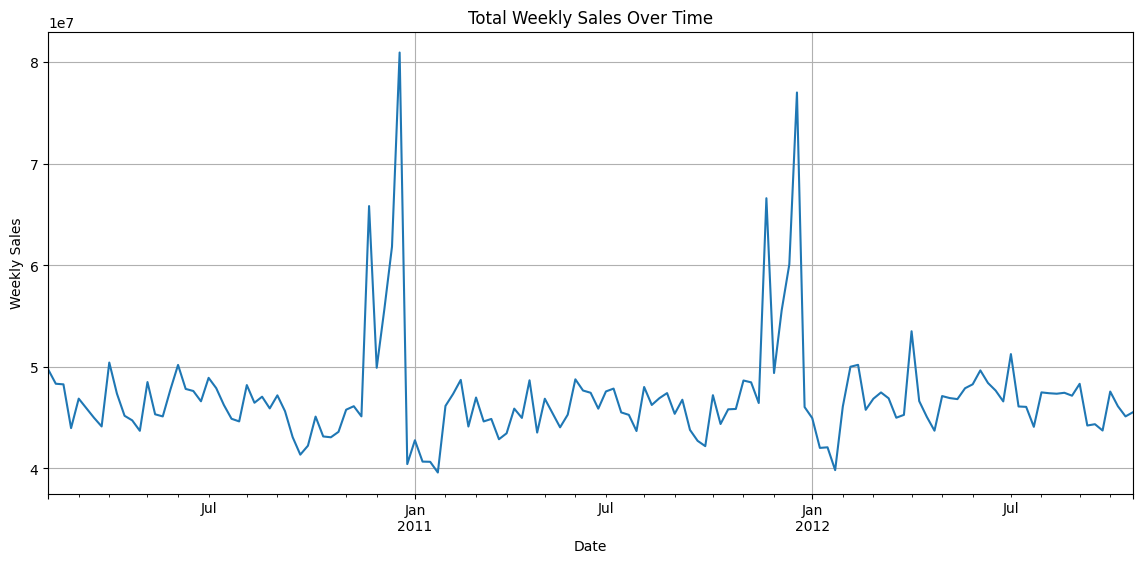

In [24]:
df.sort_values('Date', inplace=True)

plt.figure(figsize=(14, 6))
df.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

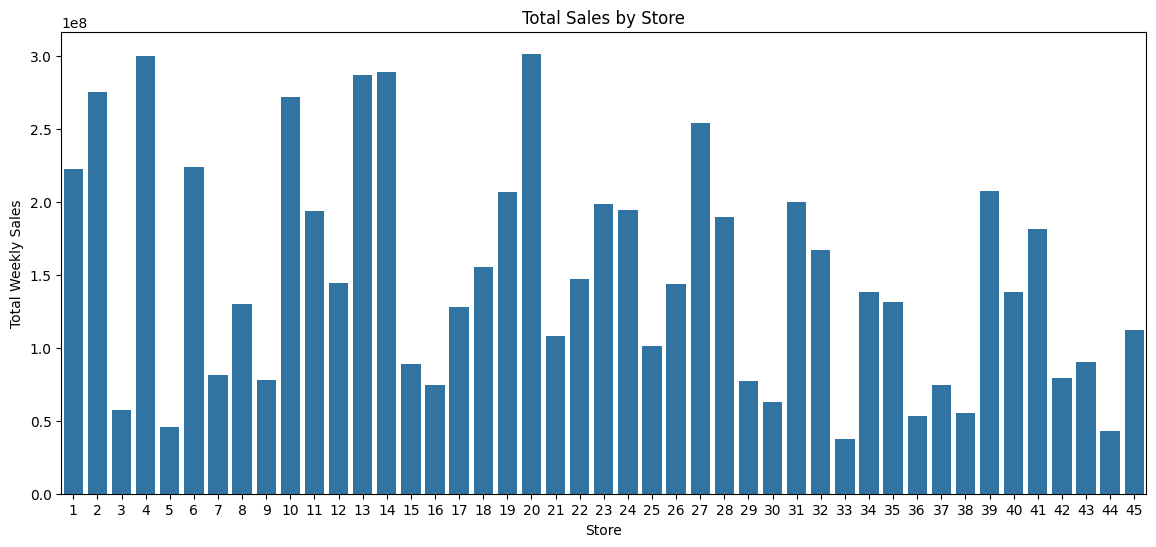

In [25]:
plt.figure(figsize = (14, 6))
store_sales = df.groupby('Store')['Weekly_Sales'].sum()
sns.barplot(x=store_sales.index, y=store_sales.values)
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Total Weekly Sales")
plt.show()

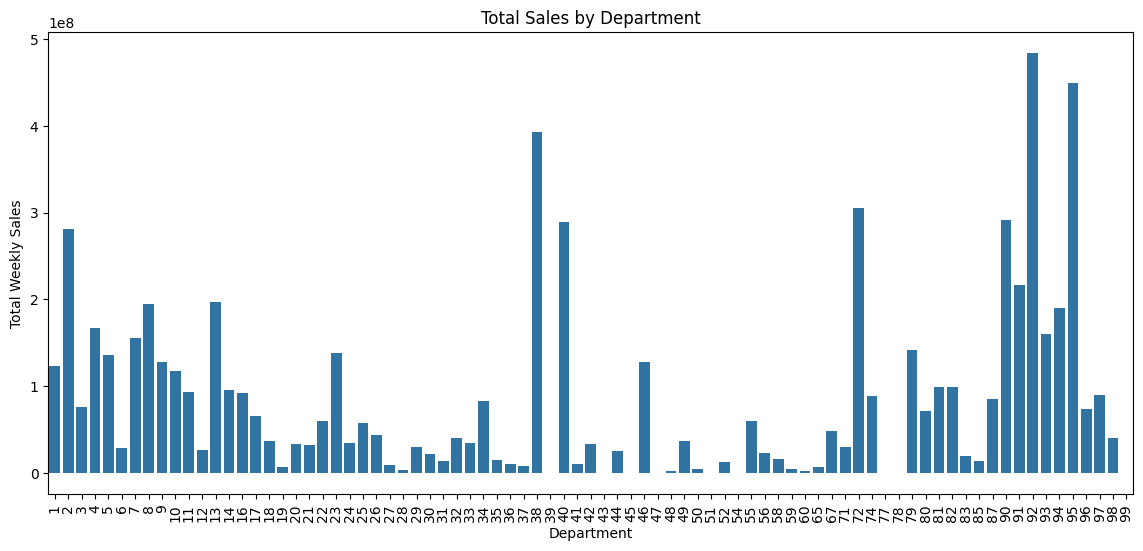

In [26]:
plt.figure(figsize = (14, 6))
department_sales = df.groupby('Dept')['Weekly_Sales'].sum()
sns.barplot(x=department_sales.index, y=department_sales.values)
plt.title("Total Sales by Department")
plt.xlabel("Department")
plt.ylabel("Total Weekly Sales")
plt.xticks(rotation=90)
plt.show()

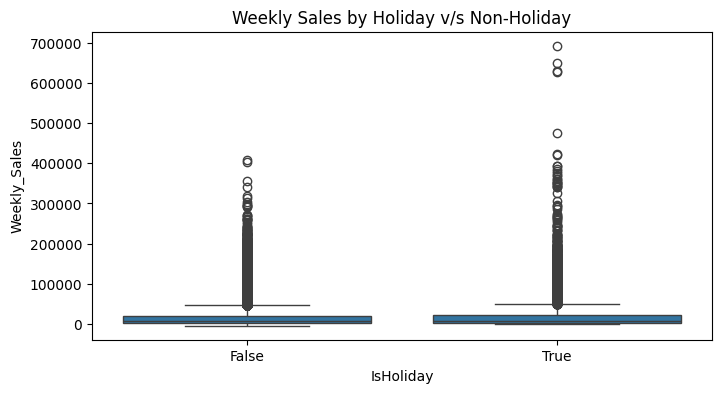

In [27]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = 'IsHoliday', y = 'Weekly_Sales', data=df)
plt.title("Weekly Sales by Holiday v/s Non-Holiday")
plt.show()

In [28]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday
df = df.drop(columns = ['Date'])

In [29]:
df['IsHoliday'] = df['IsHoliday'].astype(int)

In [30]:
df = pd.get_dummies(df, columns=['Type'], drop_first=True)


In [31]:
import sklearn
from sklearn.model_selection import train_test_split
X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [32]:
X_train

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Weekday,Type_B,Type_C
345983,36,95,1,39910,52.88,2.949,5347.45,192.00,24.60,1481.31,3359.45,210.182398,8.476,2010,12,4,False,False
262040,27,39,0,204184,41.59,3.587,2415.40,239.89,1438.33,209.34,2976.85,140.528765,7.906,2011,12,4,False,False
34951,4,41,0,205863,70.83,2.701,5347.45,192.00,24.60,1481.31,3359.45,126.136065,7.896,2010,6,4,False,False
355066,38,10,0,39690,71.81,4.031,5347.45,192.00,24.60,1481.31,3359.45,129.049032,13.736,2011,6,4,False,True
349872,37,38,0,39910,87.64,3.638,5347.45,192.00,24.60,1481.31,3359.45,214.360270,8.177,2011,8,4,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,22,18,0,119557,62.63,3.583,5347.45,192.00,24.60,1481.31,3359.45,140.478419,7.706,2011,10,4,True,False
198245,21,5,0,140167,81.78,3.346,7545.68,79.95,0.51,3498.46,7223.83,221.441162,6.891,2012,6,4,True,False
338537,35,81,0,103681,31.62,3.140,5347.45,192.00,24.60,1481.31,3359.45,136.529281,8.763,2010,12,4,True,False
291886,30,82,0,42988,42.72,3.016,5347.45,192.00,24.60,1481.31,3359.45,211.486469,8.028,2011,1,4,False,True


In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 472037494.71528006
R-squared: 0.09223691447842042
